显示原图 1
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


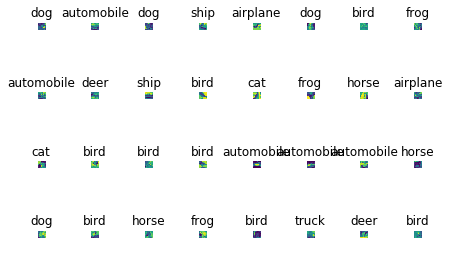

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import random

# 设置随机种子
random.seed(1)
%matplotlib inline
# 第一步：构造unpick用于读取数据
def unpickle(filename):
    # 打开文件，二进制格式
    f = open(filename, 'rb')
    # 文件的载入，编码方式为'latin1'
    out = pickle.load(f, encoding='latin1')
    f.close()
    return out
#显示原图
def image_view(filename):
    with open(filename,'rb')as f:
        data_dict = pickle.load(f,encoding='bytes')
#         data_dict = unpickle(f)

        images = data_dict[b'data']
        labels = data_dict[b'labels']
        
        #把元数据结构调整为：BCWH
        images = images.reshape(10000,3,32,32)
        #tesorflow 处理图像数据的结构为：BWHC
        #把通道数据c移动到最后一个维度
        images = images.transpose(0,2,3,1)
        labels = np.array(labels)
        return images,labels
test_image,test_label = image_view('./cifar10_data/cifar-10-batches-py/test_batch')
print('显示原图',test_label[6])

plt.imshow(test_image[6])


# 第二步：对图片进行预处理，灰度化，裁剪，标准化
def clean(data):
    # 图像的维度转换
    data_reshaped = data.reshape(-1, 3, 32, 32)
    # 进行灰度化处理
    gray_img = data_reshaped.mean(1)
    # 对图像进行裁剪
    gray_img_crop = gray_img[:, 4:28, 4:28]
    # 将图像的维度转换为原来的二维数据
    gray_img_crop = gray_img_crop.reshape([len(gray_img_crop), -1])
    # 求得图像的均值
    mean = np.mean(gray_img_crop, axis=1)
    # 将均值的维度转换为2维，以便用于后续的相减操作
    meanT = mean.reshape([len(mean), 1])
    # 求得图像的标准差
    std = np.std(gray_img_crop, axis=1)
    # 将标准差转换为2维形式
    stdT = std.reshape([len(std), 1])
    # 如果标准差过大，使用1/np.sqrt(len(stdT)代替)
    adj_std = np.maximum(stdT, 1/np.sqrt(len(stdT)))
    # 进行标准化操作
    normalize = (gray_img_crop - meanT) / adj_std

    return normalize


# 第三步：数据的载入
def load_data(filename):
    # 数据标签名的读入
    names = unpickle('{}/batches.meta'.format(filename))['label_names']
    data = []
    labels = []
    for i in range(1, 6):
        # 循环读取，每一个文件的数据和标签名
        data_dict = unpickle('{}/data_batch_{}'.format(filename, i))
#         print('这是源数据',data_dict['data'])
        if len(data) > 0 :
            # 对数据进行竖着串接
            data = np.vstack((data, data_dict['data']))
            # 对标签进行横着串接
            labels = np.hstack((labels, data_dict['labels']))
        else:
            data = data_dict['data']
            labels = data_dict['labels']
    #显示源图片
#     print("这是原图")
#     plt.figure()
#     plt.imshow(data)
    # 对数据进行预处理操作
    data = clean(data)
    # 将数据的类型转换为np.float32
    data = data.astype(np.float32)
    # 返回标签名，数据，标签
    return names, data, labels

names, data, labels = load_data('./cifar10_data/cifar-10-batches-py')
print(names)
# 第四步：进行图像的随机展示
def show_random_img(names, data, labels):
    # 数据的大小
    N = data.shape[0]
    # 横和列的个数
    rows, cols = 4, 8
    # 从N个数据列表中，随机挑选4*8个数据的索引值
    randix = random.sample(range(N), rows*cols)
#     plt.figure()
    for i in range(rows * cols):
        # 循环，构造每一个图的子图
        plt.subplot(rows, cols, i+1)
        # 获得单个的索引值
        j = randix[i]
        # 文章名 ，使用标签对应的类别名
        plt.title(names[labels[j]])
        # 图像的维度转换
        img = data[j,:].reshape([24, 24])
#         img = data[j,:].reshape([32,32])
        # 图片的展示
#         plt.imshow(img, cmap='Greys_r')
        plt.imshow(img)

        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_random_img(names, data, labels)

显示原图 1


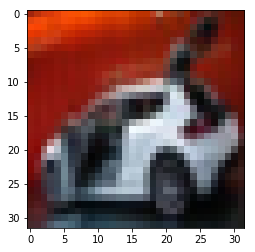

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import random

# 设置随机种子
random.seed(1)
%matplotlib inline
# 第一步：构造unpick用于读取数据
def unpickle(filename):
    # 打开文件，二进制格式
    f = open(filename, 'rb')
    # 文件的载入，编码方式为'latin1'
    out = pickle.load(f, encoding='latin1')
    f.close()
    return out
#显示原图
def image_view(filename):
    with open(filename,'rb')as f:
        data_dict = pickle.load(f,encoding='bytes')
#         data_dict = unpickle(f)

        images = data_dict[b'data']
        labels = data_dict[b'labels']
        
        #把元数据结构调整为：BCWH
        images = images.reshape(10000,3,32,32)
        #tesorflow 处理图像数据的结构为：BWHC
        #把通道数据c移动到最后一个维度
        images = images.transpose(0,2,3,1)
        labels = np.array(labels)
        return images,labels
test_image,test_label = image_view('./cifar10_data/cifar-10-batches-py/test_batch')
print('显示原图',test_label[6])

plt.imshow(test_image[6])



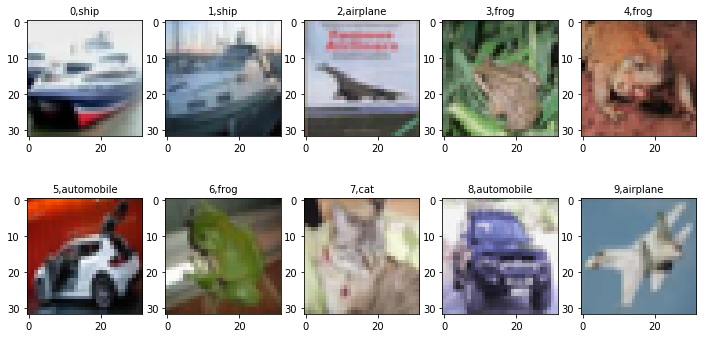

In [7]:
#建立标签字典方便后期 查询 类别名称
label_dict = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}
def plot_image_labels_prediction(images,labels,prediction,idx,num=10):
    fig =plt.gcf()
    fig.set_size_inches(12,6)
    if num > 10:
        num=10
    for i in range(0,num):
        ax = plt.subplot(2,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        
        title=str(i)+','+label_dict[labels[idx]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10)
        
        idx+=1
    plt.show()
    
plot_image_labels_prediction(test_image,test_label,[],1,10)
            

In [4]:
from datetime import datetime
tf.reset_default_graph()

#第三部分： 开始进行正式的模型训练
# 第一步：使用tf.placeholder()进行输入数据的初始化
x = tf.placeholder(tf.float32, [None, 24*24],name='x')
y = tf.placeholder(tf.float32, [None, len(names)],name='y')

# 第二步：构造卷积和全连接的参数
# W1的维度为5,5,1, 64
W1 = tf.Variable(tf.random_normal([5, 5, 1, 64]))
# b1的维度为64
b1 = tf.Variable(tf.random_normal([64]))
# W2的维度为5,5,64,64
W2 = tf.Variable(tf.random_normal([5, 5, 64, 64]))
# b2的维度为64
b2 = tf.Variable(tf.random_normal([64]))
# W3的维度为6*6*64， 1024
W3 = tf.Variable(tf.random_normal([6*6*64, 1024]))
# b3的维度为64
b3 = tf.Variable(tf.random_normal([1024]))
# W_out的维度为1024,10
W_out = tf.Variable(tf.random_normal([1024, len(names)]))
# b_out的维度为10
b_out = tf.Variable(tf.random_normal([len(names)]))
# 第三步：构建卷积和激活层的函数
def conv(x, w, b):

    return tf.nn.relu(tf.nn.conv2d(x, w, strides=[1, 1, 1, 1], padding='SAME') + b)
# 第四步：构建池化层的函数
def pool(x, k=2):

    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
# 第五步：构建模型，进行卷积和全连接的操作
# def model():
# 进行输入x的维度变换，以便进行后续的卷积操作
x_reshapedd = tf.reshape(x, shape=[-1, 24, 24, 1])
# 进行卷积操作
conv_h1 = conv(x_reshapedd, W1, b1)
# 进行池化操作
pool_h1 = pool(conv_h1)
# 进行非极大值抑制操作
norm1 = tf.nn.lrn(pool_h1, 4, bias=1.0, alpha=0.001/9.0, beta=0.75)
# 进行第二次卷积操作
conv_h2 = conv(norm1, W2, b2)
# 进行非极大值抑制操作
norm2 = tf.nn.lrn(conv_h2, 4, bias=1.0, alpha=0.001/9.0, beta=0.75)
# 进行池化操作
pool_h2 = pool(norm2)
# 重构池化层后的矩阵维度，为了进行全连接操作
fc1_input = tf.reshape(pool_h2, [-1, 6*6*64])
# 进行第一次全连接操作
fc_h1 = tf.nn.relu(tf.matmul(fc1_input, W3) + b3)
# 进行第二次全连接操作
fc_out = tf.matmul(fc_h1, W_out) + b_out
soft_out = tf.nn.softmax(fc_out,name = 'soft_out')

#     return fc_out
# 第六步：获得得分，使用tf.nn.softmax_cross获得softmax的损失值
# model_op = model()
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=fc_out, labels=y))
# 第七步：使用自适应损失值优化器，进行损失值的下降
train_op = tf.train.AdamOptimizer(0.001).minimize(cost)
# 第八步：使用tf.equal和tf.reduce_mean求出准确度
correct_pred = tf.equal(tf.argmax(fc_out, 1), tf.argmax(y, 1))
print(correct_pred)
accur = tf.reduce_mean(tf.cast(correct_pred, 'float'))

saver = tf.train.Saver()

batch_size = 1



# 第九步：构造sess，并进行初始化
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # 第十步：对标签使用one-hot编码，并使用sess.run()转换回数据类型
    train_labels = tf.one_hot(labels, len(names), axis=-1)
    train_labels = sess.run(train_labels)
    print('取完训练数据')
    saver.restore(sess,'./train_plt/model.ckpt')
    print('取完模型')
    start = datetime.now()
#     for j in range(1001):
#         # 第十一步：设置batchsize大小，即average的平均值为0
#         average = 0
#         batch_num = 0
#         for i in range(0, len(data), batch_size):
#             # 第十二步：使用data[i:i+batch_size, :] 获得batch数据和batch标签值
    train_data = data[0:batch_size, :]
    train_label = train_labels[0:batch_size, :]
    # 第十三步：将batch数据和标签值带入，用于进行损失值的降低和准确率的计算
    predict = sess.run(soft_out, feed_dict={x:train_data})
    print(predict)
#             average += accurracy
#             batch_num += 1
#         # 第十四步：求出平均准确率并打印    
#         average /= batch_num
#         print('epoch average accurracy %g'%(average, ))
    end = datetime.now()
    latency = (end - start).total_seconds()
    print("The latency is   "+str(latency)+"秒")
#     saver.save(sess, './train_plt_1/model.ckpt')

Tensor("Equal:0", shape=(?,), dtype=bool)
取完训练数据
INFO:tensorflow:Restoring parameters from ./train_plt/model.ckpt


NotFoundError: Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key Variable/Adam not found in checkpoint
	 [[node save/RestoreV2 (defined at E:\soft\anaconda\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]

Original stack trace for 'save/RestoreV2':
  File "E:\soft\anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "E:\soft\anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "E:\soft\anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "E:\soft\anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "E:\soft\anaconda\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "E:\soft\anaconda\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "E:\soft\anaconda\lib\asyncio\base_events.py", line 539, in run_forever
    self._run_once()
  File "E:\soft\anaconda\lib\asyncio\base_events.py", line 1775, in _run_once
    handle._run()
  File "E:\soft\anaconda\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "E:\soft\anaconda\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "E:\soft\anaconda\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "E:\soft\anaconda\lib\site-packages\tornado\gen.py", line 781, in inner
    self.run()
  File "E:\soft\anaconda\lib\site-packages\tornado\gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "E:\soft\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "E:\soft\anaconda\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "E:\soft\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "E:\soft\anaconda\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "E:\soft\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "E:\soft\anaconda\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "E:\soft\anaconda\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "E:\soft\anaconda\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "E:\soft\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "E:\soft\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "E:\soft\anaconda\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "E:\soft\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "E:\soft\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "E:\soft\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-2dfb4ab559cb>", line 69, in <module>
    saver = tf.train.Saver()
  File "E:\soft\anaconda\lib\site-packages\tensorflow_core\python\training\saver.py", line 828, in __init__
    self.build()
  File "E:\soft\anaconda\lib\site-packages\tensorflow_core\python\training\saver.py", line 840, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "E:\soft\anaconda\lib\site-packages\tensorflow_core\python\training\saver.py", line 878, in _build
    build_restore=build_restore)
  File "E:\soft\anaconda\lib\site-packages\tensorflow_core\python\training\saver.py", line 508, in _build_internal
    restore_sequentially, reshape)
  File "E:\soft\anaconda\lib\site-packages\tensorflow_core\python\training\saver.py", line 328, in _AddRestoreOps
    restore_sequentially)
  File "E:\soft\anaconda\lib\site-packages\tensorflow_core\python\training\saver.py", line 575, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "E:\soft\anaconda\lib\site-packages\tensorflow_core\python\ops\gen_io_ops.py", line 1696, in restore_v2
    name=name)
  File "E:\soft\anaconda\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "E:\soft\anaconda\lib\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "E:\soft\anaconda\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "E:\soft\anaconda\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "E:\soft\anaconda\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


在用restore提取已经训练好的模型图时  本页面所构建的graph代码 必须要和训练 graph代码一致 否则 运用不了相关tensor 节点 